In [3]:
"""

Author: Camila Losada
"""

'\n\nAuthor: Camila Losada\n'

## Example on how to use NeuronData structure to analize individual neurons

In [17]:
# Import libraries
from compdec_v4pfclip_01.utils.structures.neuron_data import NeuronData
from compdec_v4pfclip_01.utils import config_task
from compdec_v4pfclip_01.utils.trials import align_trials,select_trials
from compdec_v4pfclip_01.analyses.dataviz.raster_sdt import raster

import numpy as np
from matplotlib import pyplot as plt

import platform
import glob

In [ ]:
basepath = '...'

In [1]:
area='lip'
subpath = f'/session_struct/{area}/neurons'
path_list = glob.glob(f'{basepath}{subpath}/*')
path_list

NameError: name 'glob' is not defined

In [7]:
filepath = "/2023-02-24_10-43-44_Riesling_lip_e1_r1_good1_neu.h5" 
neu = NeuronData.from_python_hdf5(f'{basepath}{subpath}{filepath}') # read neuron data

In [8]:
# General information about the neuron
print(f'subject: {neu.subject}')
print(f'area: {neu.area}')
print(f'date_time: {neu.date_time}')
print(f'cluster_id: {neu.cluster_id}')
print(f'cluster_group: {neu.cluster_group}')
print(f'cluster_number: {neu.cluster_number}')
print(f'cluster_ch: {neu.cluster_ch}')
print(f'cluster_depth: {neu.cluster_depth}')

subject: Riesling
area: lip
date_time: 2023-02-24_10-43-44
cluster_id: 0
cluster_group: good
cluster_number: 1
cluster_ch: 12
cluster_depth: 650


In [9]:
neu.get_neuron_id() # function that generates the id of the neuron

'2023-02-24_10-43-44_Riesling_lip_e1_r1_good1'

In [10]:
# Behavioural information
print(f'block: {neu.block}')
mask_b1 = neu.block==1 # DMTS
mask_b2 = neu.block==2 # Saccade
print(f'Number of trials: {len(neu.block)}')
print(f'Number of trials in block 1: {np.sum(mask_b1)}')
print(f'Number of trials in block 2: {np.sum(mask_b2)}')
## Check number of correct trials (error = 0)
mask_err0 = neu.trial_error==0
print(f'Number of correct trials: {np.sum(mask_err0)}')
print(f'Number of correct trials in block 1: {np.sum(np.logical_and(mask_err0,mask_b1))}')
print(f'Number of correct trials in block 2: {np.sum(np.logical_and(mask_err0,mask_b2))}')

block: [2 2 2 ... 1 1 1]
Number of trials: 1100
Number of trials in block 1: 1000
Number of trials in block 2: 100
Number of correct trials: 518
Number of correct trials in block 1: 438
Number of correct trials in block 2: 80


In [11]:
ntr = 5
## Block 2: saccade
print(f'possible samples: {np.unique(neu.sample_id[mask_b2])}')
print(f'possible sample location: {np.unique(neu.pos_code[mask_b2])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample location {neu.pos_code[mask_b2].shape}: {neu.pos_code[mask_b2][:ntr]}')
print(f'events code {neu.code_numbers[mask_b2].shape}: \n{neu.code_numbers[mask_b2][:ntr]}')
print(f'events time {neu.code_samples[mask_b2].shape}: \n{neu.code_samples[mask_b2][:ntr]}') # All trials are aligned to start trial (code 9)

possible samples: [nan]
possible sample location: [120. 121. 122. 123. 124. 125. 126. 127.]

information about the first 5 trials:
sample location (100,): [121. 126. 125. 122. 122.]
events code (100, 20): 
[[  9.  35.   8.  37. 121.  38.  36.  38.  18.  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 126.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 125.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  50.  36.  18.  nan  nan  nan  nan  nan  nan  nan  nan
   nan  nan  nan  nan  nan  nan]
 [  9.  35.   8.  37. 122.  38.  36.  10.  10.  10.  40.  56.  18.  nan
   nan  nan  nan  nan  nan  nan]]
events time (100, 20): 
[[1000. 1022. 1288. 1646. 1648. 1764. 2775. 3587. 3589.   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan]
 [1000. 1014. 1829. 2191. 2193. 2308. 3320. 3475. 3776. 3791. 3850. 4007.
  4007.   nan   nan   nan   nan   nan   nan  

In [12]:
## Block 1: DMTS
print(f'possible samples: {np.unique(neu.sample_id[mask_b1])}')
print(f'possible sample location: {np.unique(neu.pos_code[mask_b1])}')
print(f'\ninformation about the first {ntr} trials:')
print(f'sample id {neu.sample_id[mask_b1].shape}: {neu.sample_id[mask_b1][:ntr]}')
print(f'test stimuli {neu.test_stimuli[mask_b1].shape}: \n{neu.test_stimuli[mask_b1][:ntr]}')
print(f'test distractor {neu.test_distractor[mask_b1].shape}: \n{neu.test_distractor[mask_b1][:ntr]}')
print(f'events code {neu.code_numbers[mask_b1].shape}: \n{neu.code_numbers[mask_b1][:ntr]}')
print(f'events time {neu.code_samples[mask_b1].shape}: \n{neu.code_samples[mask_b1][:ntr]}') # All trials are aligned to 1000 ms before the start of the trial

possible samples: [ 0. 11. 15. 51. 55.]
possible sample location: [-1.  1.]

information about the first 5 trials:
sample id (1000,): [ 0. 15. 51.  0. 11.]
test stimuli (1000, 5): 
[[13. 31. nan nan nan]
 [17. nan nan nan nan]
 [51. nan nan nan nan]
 [51. 25. 14. nan nan]
 [12. nan nan nan nan]]
test distractor (1000, 5): 
[[44. 68. nan nan nan]
 [63. nan nan nan nan]
 [88. nan nan nan nan]
 [88. 22. 38. nan nan]
 [42. nan nan nan nan]]
events code (1000, 20): 
[[ 9.  7. 35.  8. 23. 24. 25. 26. 27. 97. 36. 28. 18. nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25.  4. 36. 26. 96. 18. nan nan nan nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 26. 27. 28. 29. 97. 36. 30. 18. nan nan nan
  nan nan]
 [ 9.  7. 35.  8. 23. 24. 25. 97. 36. 26. 18. nan nan nan nan nan nan nan
  nan nan]]
events time (1000, 20): 
[[1000. 1011. 1017. 1234. 1441. 1900. 2653. 3112. 3112. 3332. 3347. 3347.
  4151.  

spikes (1000, 10070): 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


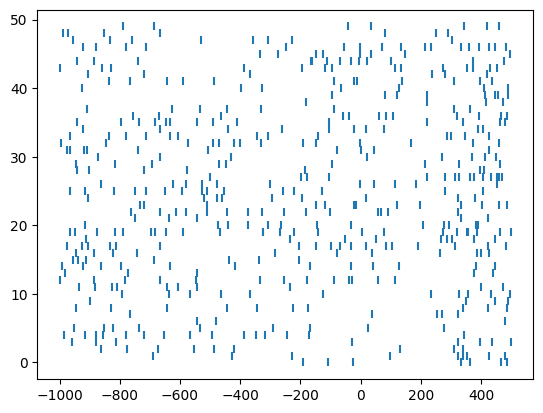

In [13]:
# Spikes
# Each row in sp_samples is one trial 
# All trials are aligned to 1000 ms before the start of the trial 
len_tr = neu.sp_samples[mask_b1].shape[1]
spikes = neu.sp_samples[mask_b1]
print(f'spikes {neu.sp_samples[mask_b1].shape}: \n{spikes[:ntr]}')
rows, cols = np.where(spikes[:50,:1500] >= 1)
_=plt.scatter(cols-1000,rows,marker="|",)

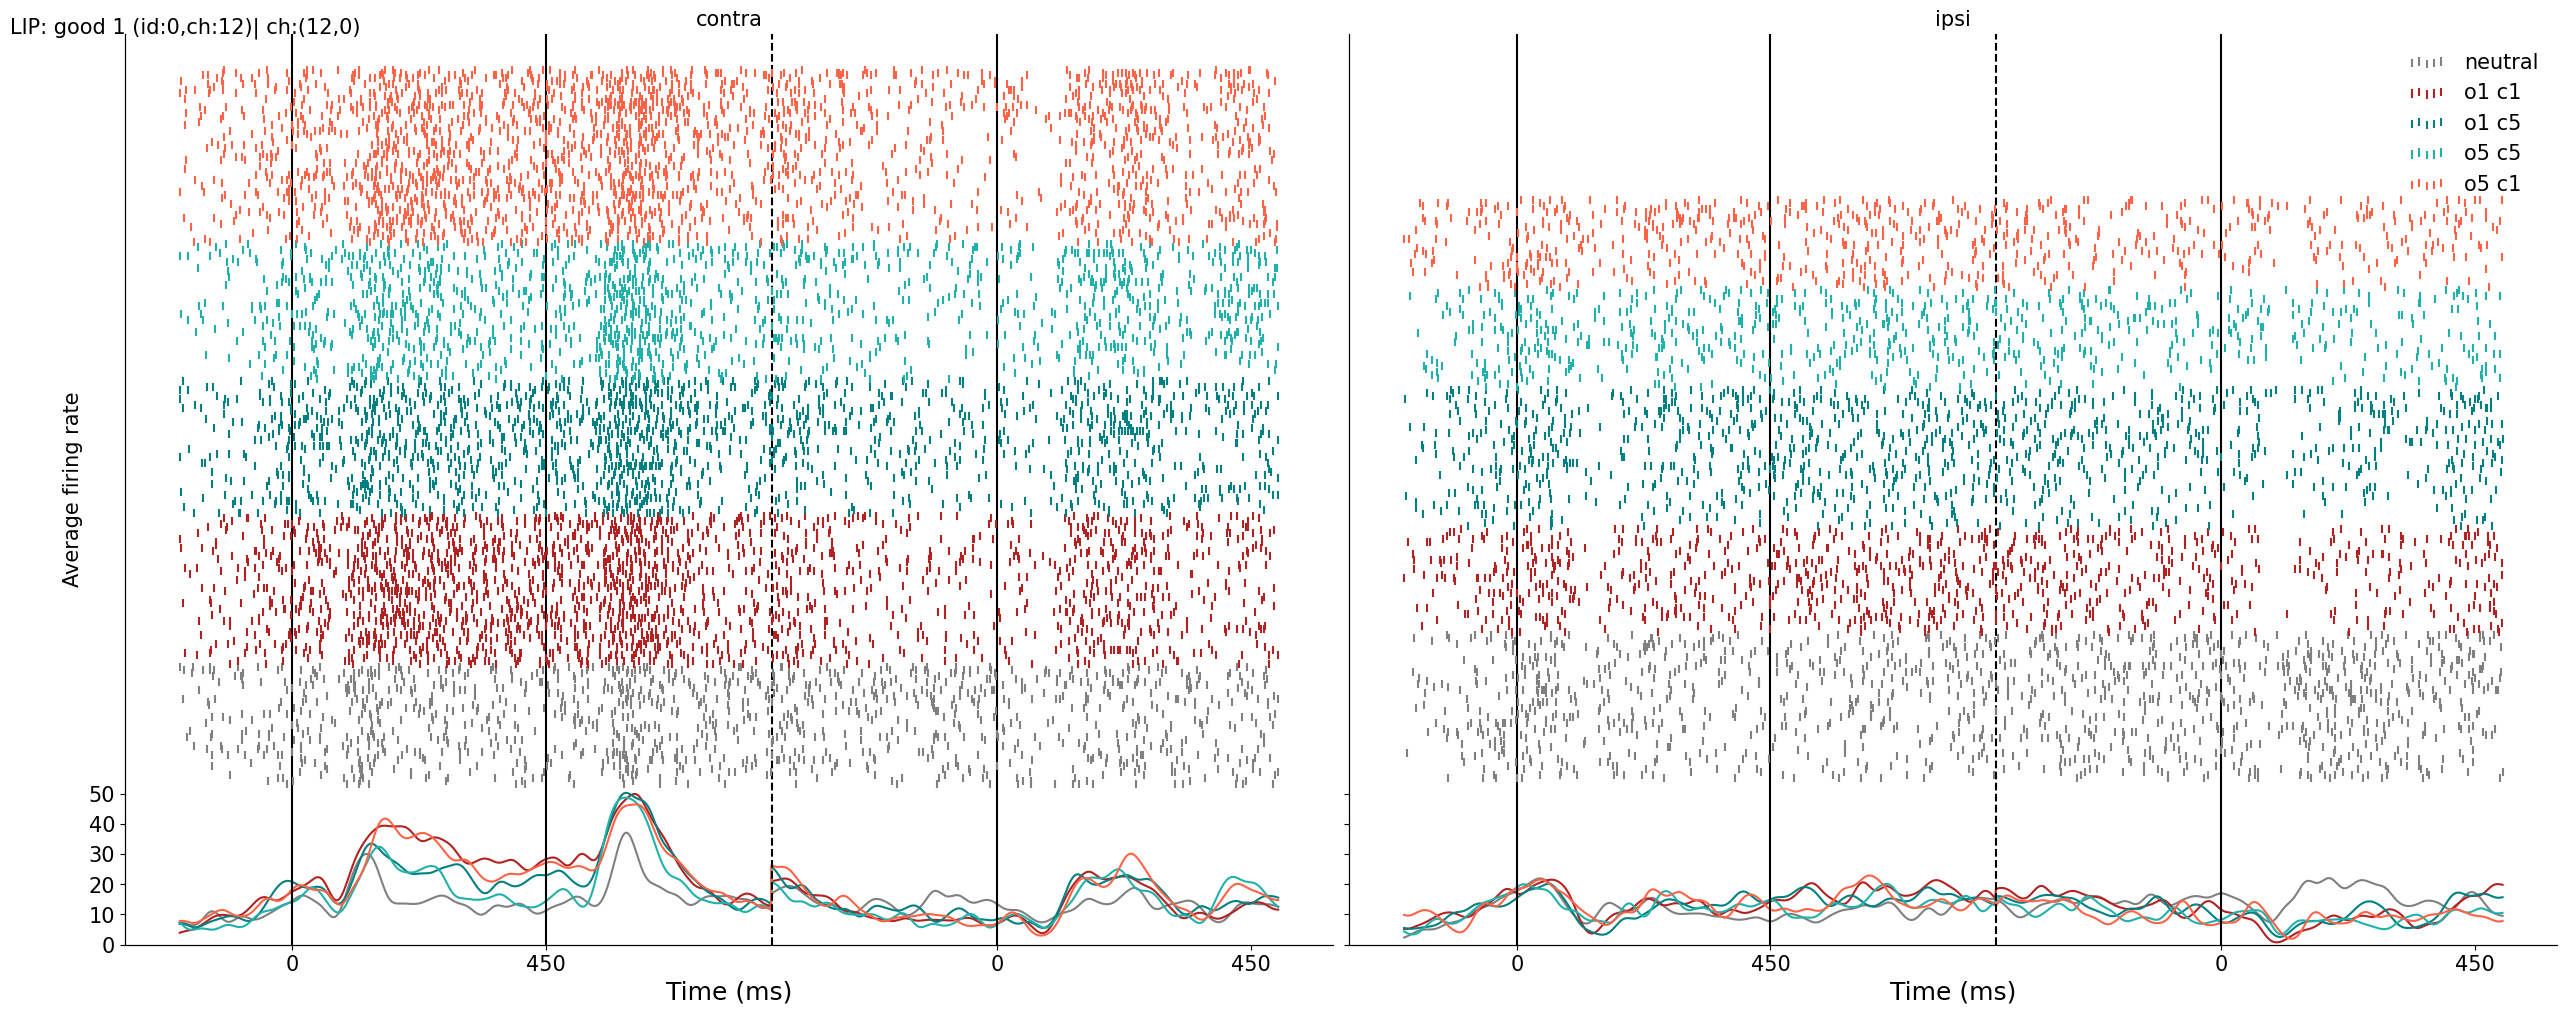

In [21]:
# Lets plot all trials
sp, conv = raster.prepare_data_plotb1(neu)
fig=raster.plot_sp_b1(neu,sp, conv)

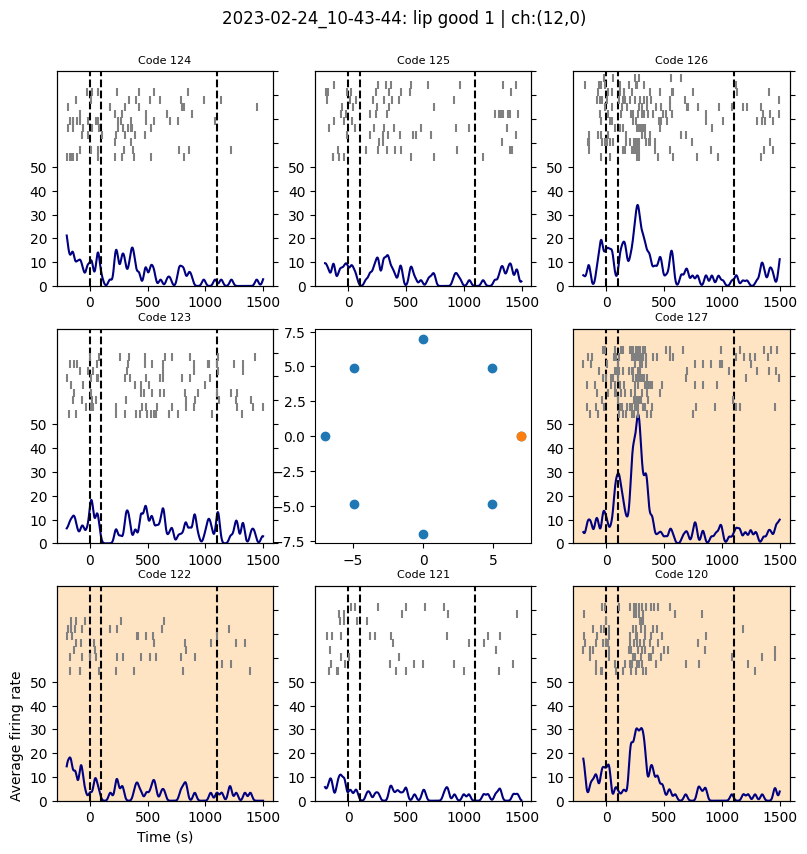

In [26]:
# Lets plot all trials
sp_pos, conv_pos, max_n_tr, conv_max = raster.prepare_data_plotb2(neu)
fig=raster.plot_sp_b2(neu,sp_pos,conv_pos,max_n_tr,conv_max)